In [99]:
import pandas as pd
import numpy as np
import os
from faker import Faker
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")

## 1. Load data from CSVs

In [125]:
weather_df = pd.read_csv('../data/weather_cleandata.csv')
waittime_df = pd.read_csv('../data/waittime_cleandata.csv')

## 2. Generate External Factors (Date Sensitive Factors)
We will be considering the following events: 
- Public Holidays and School Holidays
- Special/ Seasonal events
    - Halloween Horror Nights
    - Minion Land Grand Opening
    - A Universal Christmas: A *Wicked* Christmas

#### Step 1: Two dictionaries on holidays and seasonal events are created.

In [101]:
# Define dictionary for Public holidays and School holidays between 1 Jan 2024- 29 Feb 2025
holidays = {
    2024: {
    "New Year’s Day": '2024-01-01',
    "Chinese New Year": '2024-02-10',
    "Chinese New Year": '2024-02-11',
    "Chinese New Year": '2024-02-12',
    "March Holidays": ['2024-03-09','2024-03-10', '2024-03-11', '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17'],
    "Good Friday": '2024-03-29',
    "Hari Raya Puasa": '2024-04-10',
    "Labour Day": '2024-05-01',
    "Vesak Day": '2024-05-22',
    "June Holidays": ['2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31',
                      '2024-06-01','2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10',
                      '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20',
                      '2024-06-21', '2024-06-22', '2024-06-23'],
    "Hari Raya Haji": '2024-06-17',
    "National Day": '2024-08-09',
    "September Holidays": ['2024-09-31', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08'],
    "Deepavali": '2024-10-31',
    "December Holidays": ['2024-11-16', '2024-11-17', '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24', '2024-11-25',
                          '2024-11-26', '2024-11-27', '2024-11-28', '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05',
                          '2024-12-06', '2024-12-07', '2024-12-08', '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14', '2024-12-15',
                          '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
                          '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30', '2024-12-31'],
    "Christmas Day": '2024-12-25'
    },

    2025: {
    "New Year’s Day": '2025-01-01',
    "Chinese New Year": '2025-01-29',
    "Chinese New Year": '2025-01-30',
    "March Holidays": ['2025-03-15', '2025-03-16', '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-22', '2025-03-23'],
    "Hari Raya Puasa": '2025-03-31',
    "Good Friday": '2025-04-18',
    "Labour Day": '2025-05-01',
    "Vesak Day": '2025-05-12',
    "June Holidays": ['2025-05-31', '2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04', '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08', '2025-06-09',
                      '2025-06-10', '2025-06-11', '2025-06-12', '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16', '2025-06-17', '2025-06-18', '2025-06-19',
                      '2025-06-20', '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24', '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28', '2025-06-29'],
    "Hari Raya Haji": '2025-06-07',
    "National Day": '2025-08-09',
    "September Holidays" :['2025-09-06', '2025-09-07', '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-13', '2025-09-14'],
    "Deepavali": '2025-10-20',
    "Decemeber Holidays": ['2025-11-22', '2025-11-23', '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-27', '2025-11-28', '2025-11-29', '2025-11-30', '2025-12-01',
                           '2025-12-02', '2025-12-03', '2025-12-04', '2025-12-05', '2025-12-06', '2025-12-07', '2025-12-08', '2025-12-09', '2025-12-10', '2025-12-11',
                           '2025-12-12', '2025-12-13', '2025-12-14', '2025-12-15', '2025-12-16', '2025-12-17', '2025-12-18', '2025-12-19', '2025-12-20', '2025-12-21',
                           '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25', '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29', '2025-12-30', '2025-12-31'],
    "Christmas Day": '2025-12-25'
    }
}

# Define dictionary for USS special/seaonal events between 1 Jan 2024- 29 Feb 2025
seasonal_events = {
    2024: {
        "HHN": ['2024-09-27', '2024-09-28', '2024-10-03', '2024-10-04', '2024-10-05', '2024-10-10', '2024-10-11', '2024-10-12', '2024-10-17', '2024-10-18','2024-10-19',
                '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-24', '2024-10-25', '2024-10-26', '2024-10-31', '2024-10-31', '2024-11-01', '2024-11-02'],
        "A Universal Christmas": ['2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06', '2024-12-07', '2024-12-08',
                                  '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18',
                                 '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-28',
                                 '2024-12-29', '2024-12-30', '2024-12-31']
        
    },

    2025: {
        "A Universal Christmas": '2025-01-01',
        "Minion Land Opening": '2025-02-14'
    }
}

#### Step 2: Create functions to check whether date is a holiday or seasonal event day

In [102]:
# Define function to check if a date is a public holiday
def is_public_holiday(date):
    for year in holidays:
        for holiday in holidays[year]:
            if date in holidays[year][holiday]:
                return 1
    return 0

# Define function to check if a date is a seasonal event day
def is_seasonal_event(date):
    for year in seasonal_events:
        for event in seasonal_events[year]:
            if date in seasonal_events[year][event]:
                return 1
    return 0

## 3. Generate Datafames and Synthetic Data
The 3 dataframes we will be creating are:
- attractions_df : dataframe that that contains the list of attractions
- dine_df: dataframe that lists dining options
    - calculate visitor count data every 2 hours using Survey Q14.6
- retail_df: dataframe that lists retail options
    - calculate visitor count data every 2 hours using Survey Q14.7

### 3.1 attractions_df

In [103]:
attractions_info = {
    "Ride": [
        "Accelerator",
        "Battlestar Galactica: CYLON",
        "Battlestar Galactica: HUMAN",
        "Canopy Flyer",
        "Dino-Soarin",
        "Enchanted Airways",
        "Jurassic Park Rapids Adventure",
        "Lights, Camera, Action! Hosted by Steven Spielberg",
        "Magic Potion Spin",
        "Puss In Boots’ Giant Journey",
        "Revenge of the Mummy",
        "Sesame Street Spaghetti Space Chase",
        "Shrek 4-D Adventure",
        "Transformers The Ride: The Ultimate 3D Battle",
        "Treasure Hunters"
    ],
    "Zone": [
        "Sci-Fi City", "Sci-Fi City", "Sci-Fi City", "The Lost World", "The Lost World", "Far Far Away", 
        "The Lost World", "New York", "Far Far Away", "Far Far Away", "Ancient Egypt", "New York", "Far Far Away",
        "Sci-Fi City", "Ancient Egypt"
    ],
    "Thrill": [0,1,1,1,0,1,0,0,0,0,1,0,0,0,0],  #thrill ride =1, non-thrill ride =0
    "Indoor": [1,0,0,0,0,0,0,1,1,1,1,1,1,1,0]  #indoors =1, outdoors =0
}

attractions_df = pd.DataFrame(attractions_info)
attractions_df.to_csv("attractions_df.csv")

### 3.2 dine_df
- Assumes visitors will dine at zones they are currently at
- Step 1: Generate the count of dining visitors using the number of Visitors for attractions (i.e., "Visitor Count" of waittime_df)
- Step 2: Factor in weights for time slot and number of restaurants in zone

In [104]:
## Step 1: Generate count of dining visitors
# Group Watitime data by time slots
dine_df = waittime_df.copy()
dine_df["Time Slot"] = pd.cut(
    dine_df["Date/Time"],
    bins=[10, 12, 14, 16, 18, 20],
    labels=["10-12", "12-2", "2-4", "4-6", "6-8"],
    right=False
)
# Get total visitors per time slot
dine_df = dine_df.groupby(["Date", "Zone", "Time Slot"])["Visitor Count"].sum().reset_index()
# Generate percentage of visitors dining per time slot dictionary based on survey Q14.6
dining_pct = {
        "10-12" : 29.3 ,
        "12-2": 43.1,
        "2-4": 36.1,
        "4-6": 33.9,
        "6-8": 31.7,
}
# Normalize dining percentages
dining_pct_vals = {k: v / 100 for k, v in dining_pct.items()}

# Apply dining percetanges to adjust dining count
dine_df["Dining Visitor Count"] = dine_df.apply(lambda row: int(row["Visitor Count"] * dining_pct_vals[row["Time Slot"]]), axis=1)

# Scale number of dining visitors proportionate to attraction visitors
dine_df["Dining Visitor Count"] = dine_df["Dining Visitor Count"] * 0.5
dine_df.drop(columns=["Visitor Count"], inplace=True)
print(dine_df.head())

         Date           Zone Time Slot  Dining Visitor Count
0  2024-01-01  Ancient Egypt     10-12                 165.0
1  2024-01-01  Ancient Egypt      12-2                 463.0
2  2024-01-01  Ancient Egypt       2-4                 419.5
3  2024-01-01  Ancient Egypt       4-6                 229.0
4  2024-01-01  Ancient Egypt       6-8                 105.5


In [105]:
# Step 2: Adjust dining visitor count based on time slot and number of restaurants in the zone
# Create dictionary to mapo out diners and zone they belong to
dine_info = {
    "Dine": [
        "KT’s Grill", 
        "Loui’s NY Pizza Parlor", 
        "StarBot Café", 
        "Star Dots", 
        "Oasis Spice Café", 
        "Frozen Fuels", 
        "Planet Yen", 
        "Cairo Market", 
        "Discovery Food Court", 
        "Fossil Fuels", 
        "Jungle Bites", 
        "Goldilocks", 
        "Friar’s"
    ],
    "Zone":[
        "New York", "New York", "Sci-Fi City", "Sci-Fi City",
        "Ancient Egypt", "Sci-Fi City", "Sci-Fi City", "Ancient Egypt", 
        "The Lost World", "The Lost World", "The Lost World",
        "Far Far Away", "Far Far Away"
        ]
}
dine_info = pd.DataFrame(dine_info)

# Understand the number of restaurants in each zone
restaurant_count_per_zone = dine_info.groupby("Zone")["Dine"].count()
print(restaurant_count_per_zone)

def apply_timeslot_weight(row):
    if row["Time Slot"] in ["12-2", "6-8"]:
        # Increase weight for lunch and dinner time slots
        weight = 1.0
    else:
        weight = 0.8  
    adjusted_visitor_count = row["Dining Visitor Count"] * weight
    return adjusted_visitor_count

def apply_restaurant_weight(row):
    if row["Zone"] == "Sci-Fi City":
        # Increase weight for Sci-Fi City
        weight = 1.0
    if row["Zone"] == "The Lost World":
        # Increase weight for The Lost World
        weight = 0.9
    elif row["Zone"] in ["New York", "Ancient Egypt", "Far Far Away"]:
        # Increase weight for New York, Ancient Egypt, Far Far Away
        weight = 0.8
    # Apply the weight to the visitor count
    adjusted_visitor_count = row["Dining Visitor Count"] * weight
    return adjusted_visitor_count

dine_df["Adjusted Visitor Count"] = dine_df.apply(apply_timeslot_weight, axis=1)
dine_df["Adjusted Visitor Count"] = dine_df.apply(apply_restaurant_weight, axis=1).round(0).astype(int)
dine_df.drop(columns=["Dining Visitor Count"], inplace=True)
print(dine_df.head())
# dine_df.to_csv('../data/dine_cleandata.csv', index=False)

Zone
Ancient Egypt     2
Far Far Away      2
New York          2
Sci-Fi City       4
The Lost World    3
Name: Dine, dtype: int64
         Date           Zone Time Slot  Adjusted Visitor Count
0  2024-01-01  Ancient Egypt     10-12                     132
1  2024-01-01  Ancient Egypt      12-2                     370
2  2024-01-01  Ancient Egypt       2-4                     336
3  2024-01-01  Ancient Egypt       4-6                     183
4  2024-01-01  Ancient Egypt       6-8                      84


### 3.3 retail_df

In [106]:
retail_info = {
    "Retail": [
        "Universal Studios Store",
        "That's a Wrap",
        "Hello Kitty Studio Store",
        "The Brown Derby",
        "Big Bird's Emporium",
        "Fairy Godmother's Potion Shop",
        "Jurassic Outfitters",
        "The Dino-Store",
        "Transformers Supply Vault" 
    ],
    "Zone": ["Hollywood", "Hollywood", "Hollywood", "Hollywood", "New York", 
            "Far Far Away", "The Lost World", "The Lost World","Sci-Fi City"
    ]
            }

retail_df = pd.DataFrame(retail_info)
print(retail_df.head())

                     Retail       Zone
0   Universal Studios Store  Hollywood
1             That's a Wrap  Hollywood
2  Hello Kitty Studio Store  Hollywood
3           The Brown Derby  Hollywood
4       Big Bird's Emporium   New York


## 4. Feature Engineering

In [126]:
# Add features as columns to waittime_df
# for day of week, 0 = Monday,..,, 6 = Sunday
waittime_df["day_of_week"] = pd.to_datetime(waittime_df["Date"]).dt.dayofweek
waittime_df["is_holiday"] = waittime_df["Date"].apply(is_public_holiday)
waittime_df["is_seasonal_event"] = waittime_df["Date"].apply(is_seasonal_event)

# Merge waititme_df with weather_df on "Date"
waittime_df = waittime_df.merge(weather_df[["Date", 'Daily Rainfall Total (mm)', 'Mean Temperature (°C)']], on="Date", how="left")
waittime_df.rename(columns={'Date/Time': 'Time', 'Daily Rainfall Total (mm)': 'Rainfall (mm)', 'Mean Temperature (°C)': 'Temperature (°C)'}, inplace=True)

features = ["is_holday", "is_seasonal_event", "day_of_week", "Daily Rainfall Total (mm)", "Mean Temperature (°C)"]

waittime_df['Date'] = pd.to_datetime(waittime_df['Date'])
waittime_df['Timestamp'] = waittime_df['Date'] + pd.to_timedelta(waittime_df['Time'], unit='h')
waittime_df.to_csv("waittime_df.csv")

## 5. Demand Prediction using Machine Learning Models
### 5.1 XGBoost
### 5.1(a) XGBoost to predict hourly wait times for Accelerator attraction

Predicted hourly wait times for Accelerator on Feb 28, 2025: 
[ 5.341446   5.7599883  5.829528   6.0700607  6.103347  18.891357
 18.198431   3.3349383  3.6134107  2.8030272]
RMSE: 2.85
R² Score: 0.6946


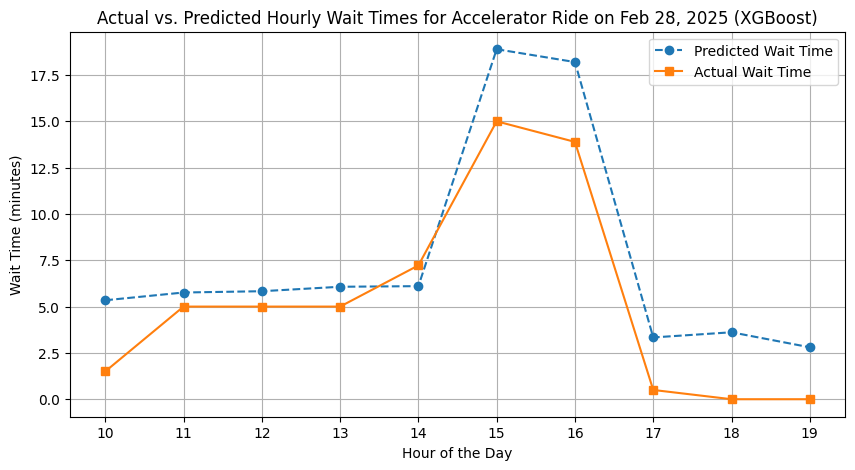

In [127]:
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

# Filter for "Accelerator" attraction before training
waittime_df_accelerator = waittime_df[waittime_df['Ride'] == "Accelerator"].copy()

# Ensure Date column is in datetime format
waittime_df_accelerator['Date'] = pd.to_datetime(waittime_df_accelerator['Date'], errors='coerce')

# Extract hour from Timestamp
waittime_df_accelerator['Hour'] = pd.to_datetime(waittime_df_accelerator['Timestamp']).dt.hour

# Identify categorical columns for encoding
categorical_columns = ["Time", "Zone", "day_of_week", "is_holiday", "is_seasonal_event"]

# OneHotEncode categorical variables
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(waittime_df_accelerator[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Merge encoded categories with waittime_df
df_encoded = pd.concat([waittime_df_accelerator, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Define independent (X) and dependent (y) variables
X = df_encoded.drop(columns=['Wait Time', 'Ride', 'Timestamp']) 
y = df_encoded['Wait Time']

# Split data: Before Feb 28, 2025 is Training, Feb 28, 2025 is Testing
train_mask = X['Date'] < datetime(2025, 2, 28)
test_mask = X['Date'] == datetime(2025, 2, 28)

X_train, y_train = X[train_mask].drop(columns=['Date']), y[train_mask]
X_test = X[test_mask].drop(columns=['Date'])
y_test = y[test_mask]

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict wait times for Feb 28, 2025
y_pred = xgb_model.predict(X_test)

# Model performance evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Predicted hourly wait times for Accelerator on Feb 28, 2025: \n{y_pred}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Prepare data for plotting
df_predictions = X_test.copy()
df_predictions['Predicted Wait Time'] = y_pred
df_predictions['Date'] = datetime(2025, 2, 28)
df_predictions['Hour'] = waittime_df_accelerator.loc[X_test.index, 'Hour'].values

df_actual = waittime_df_accelerator[waittime_df_accelerator['Date'] == datetime(2025, 2, 28)][['Hour', 'Wait Time']]

# Merge actual and predicted wait times
df_comparison = df_predictions.merge(df_actual, on='Hour', how='left')
df_comparison = df_comparison.rename(columns={'Wait Time': 'Actual Wait Time'})
df_comparison = df_comparison.sort_values(by=['Hour'])

# Plot predictions vs actual wait times
plt.figure(figsize=(10, 5))
plt.plot(df_comparison['Hour'], df_comparison['Predicted Wait Time'], marker='o', linestyle='--', label="Predicted Wait Time")
plt.plot(df_comparison['Hour'], df_comparison['Actual Wait Time'], marker='s', linestyle='-', label="Actual Wait Time")

plt.legend()
plt.title("Actual vs. Predicted Hourly Wait Times for Accelerator Ride on Feb 28, 2025 (XGBoost)")
plt.xlabel("Hour of the Day")
plt.ylabel("Wait Time (minutes)")
plt.xticks(range(10, 20, 1))  
plt.grid()
plt.show()


#### 5.1 (b) XGBoost to predict mean wait times for each ride for February 2025

Predicted wait times for Feb 2025: 
[7.252433   7.554371   7.018228   ... 0.77681077 2.9802914  2.2160342 ]
RMSE: 5.75
R² Score: 0.8974


<Figure size 1000x500 with 0 Axes>

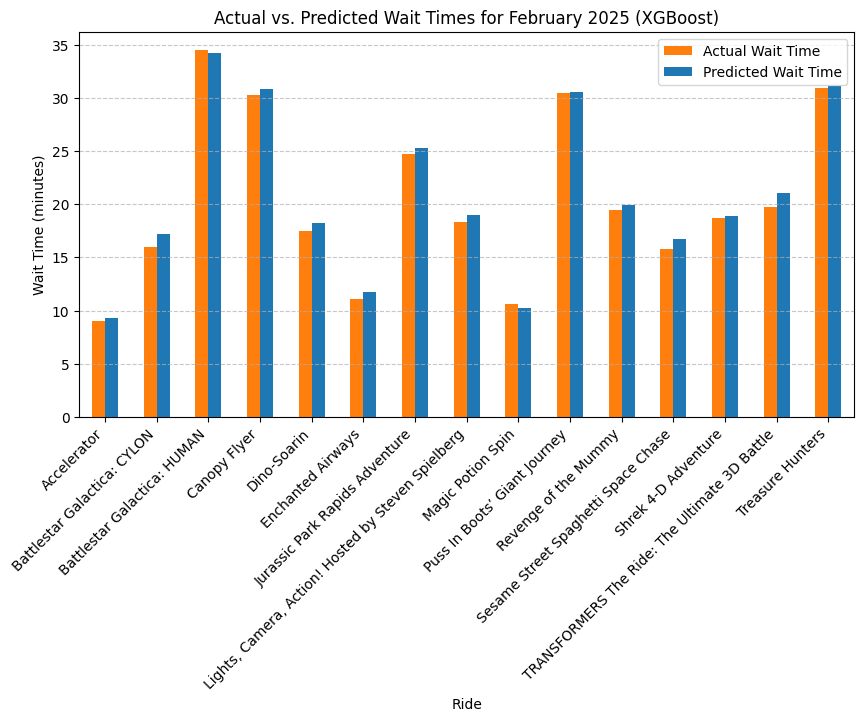

In [129]:
# Identify categorical columns for linear regression
categorical_columns = ["Ride", "Time", "Zone","day_of_week", "is_holiday", "is_seasonal_event"]
waittime_df_february = waittime_df.copy() 

# Prepare OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(waittime_df_february[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([waittime_df_february, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
# print(f"Encoded Waititme data : \n{df_encoded}")

# Identify independent and dependent variables
X = df_encoded.drop(columns=['Wait Time'])
y = df_encoded['Wait Time']

# Split data into training (before Feb 2025) and future prediction (Feb 2025)
train_mask = X['Date'] < datetime(2025, 2, 1) 
test_mask = X['Date'] >= datetime(2025, 2, 1) 

X_train, y_train = X[train_mask].drop(columns=['Date', 'Timestamp']), y[train_mask] 
X_test = X[test_mask].drop(columns=['Date', 'Timestamp'])
y_test = y[test_mask]

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Output results
print(f"Predicted wait times for Feb 2025: \n{y_pred}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Model performance evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Extract actual wait times for February 2025 from df
df_feb_2025 = waittime_df[waittime_df['Date'].dt.strftime('%Y-%m') == '2025-02']

# Create a DataFrame for predictions with corresponding rides
df_predictions = X_test.copy()
df_predictions['Predicted Wait Time'] = y_pred
df_predictions['Date'] = "2025-02"  
df_predictions['Ride'] = waittime_df_february.loc[X_test.index, 'Ride'].values

# Group actual and predicted data by Ride
actual_wait_times = df_feb_2025.groupby('Ride')['Wait Time'].mean()
predicted_wait_times = df_predictions.groupby('Ride')['Predicted Wait Time'].mean()

# Merge actual and predicted values for comparison
wait_time_comparison = pd.DataFrame({
    'Actual Wait Time': actual_wait_times,
    'Predicted Wait Time': predicted_wait_times
}).dropna()  

# Plot comparison of actual vs predicted wait times
plt.figure(figsize=(10, 5))
wait_time_comparison.plot(kind='bar', figsize=(10, 5), color=['tab:orange', 'tab:blue'])

plt.title("Actual vs. Predicted Wait Times for February 2025 (XGBoost)")
plt.xlabel("Ride")
plt.ylabel("Wait Time (minutes)")
plt.xticks(rotation=45, ha="right")
plt.legend(["Actual Wait Time", "Predicted Wait Time"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 5.2 RandomForest
### 5.2 (a) RandomForest to predict hourly wait times for Accelerator attraction

Predicted hourly wait times for Accelerator on Feb 28, 2025: 
[ 5.25478159  5.99721647  6.10974194  6.18924495  6.20648048 19.64909668
 19.36337926  3.45600222  3.94521354  2.49206336]
RMSE: 3.18
R² Score: 0.6201


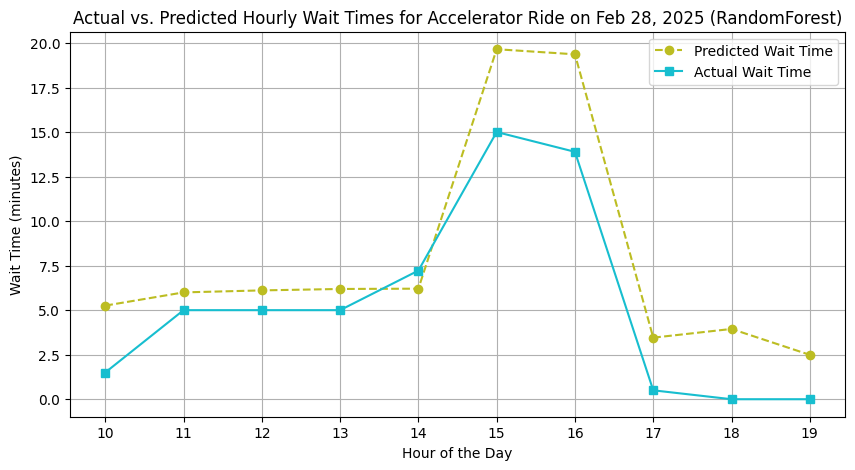

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import re
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Filter for "Accelerator" attraction before training
waittime_df_accelerator = waittime_df[waittime_df['Ride'] == "Accelerator"].copy()

# Ensure Date column is in datetime format
waittime_df_accelerator['Date'] = pd.to_datetime(waittime_df_accelerator['Date'], errors='coerce')

# Extract hour from Timestamp
waittime_df_accelerator['Hour'] = pd.to_datetime(waittime_df_accelerator['Timestamp']).dt.hour

# Identify categorical columns for encoding
categorical_columns = ["Time", "Zone", "day_of_week", "is_holiday", "is_seasonal_event"]

# OneHotEncode categorical variables
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(waittime_df_accelerator[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Merge encoded categories with waittime_df
df_encoded = pd.concat([waittime_df_accelerator, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Define independent (X) and dependent (y) variables
X = df_encoded.drop(columns=['Wait Time', 'Ride', 'Timestamp']) 
y = df_encoded['Wait Time']

# Split data: Before Feb 28, 2025 is Training, Feb 28, 2025 is Testing
train_mask = X['Date'] < datetime(2025, 2, 28)
test_mask = X['Date'] == datetime(2025, 2, 28)

X_train, y_train = X[train_mask].drop(columns=['Date']), y[train_mask]
X_test = X[test_mask].drop(columns=['Date'])
y_test = y[test_mask]

# Train RandomForest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict wait times for Feb 28, 2025
y_pred = rf_model.predict(X_test)

# Model performance evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Predicted hourly wait times for Accelerator on Feb 28, 2025: \n{y_pred}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Prepare data for plotting
df_predictions = X_test.copy()
df_predictions['Predicted Wait Time'] = y_pred
df_predictions['Date'] = datetime(2025, 2, 28)
df_predictions['Hour'] = waittime_df_accelerator.loc[X_test.index, 'Hour'].values

df_actual = waittime_df_accelerator[waittime_df_accelerator['Date'] == datetime(2025, 2, 28)][['Hour', 'Wait Time']]

# Merge actual and predicted wait times
df_comparison = df_predictions.merge(df_actual, on='Hour', how='left')
df_comparison = df_comparison.rename(columns={'Wait Time': 'Actual Wait Time'})
df_comparison = df_comparison.sort_values(by=['Hour'])

# Plot predictions vs actual wait times
plt.figure(figsize=(10, 5))
plt.plot(df_comparison['Hour'], df_comparison['Predicted Wait Time'], marker='o', color = 'tab:olive', linestyle='--', label="Predicted Wait Time")
plt.plot(df_comparison['Hour'], df_comparison['Actual Wait Time'], marker='s', linestyle='-', color = 'tab:cyan', label="Actual Wait Time")

plt.legend()
plt.title("Actual vs. Predicted Hourly Wait Times for Accelerator Ride on Feb 28, 2025 (RandomForest)")
plt.xlabel("Hour of the Day")
plt.ylabel("Wait Time (minutes)")
plt.xticks(range(10, 20, 1))  
plt.grid()
plt.show()


#### 5.2 (b) RandomForest to predict mean wait times for each ride for February 2025

Predicted wait times for Feb 2025: 
[5.40796508 5.47619423 5.40796508 ... 1.32906417 2.08707423 2.59632428]
RMSE: 5.63
R² Score: 0.9016


<Figure size 1000x500 with 0 Axes>

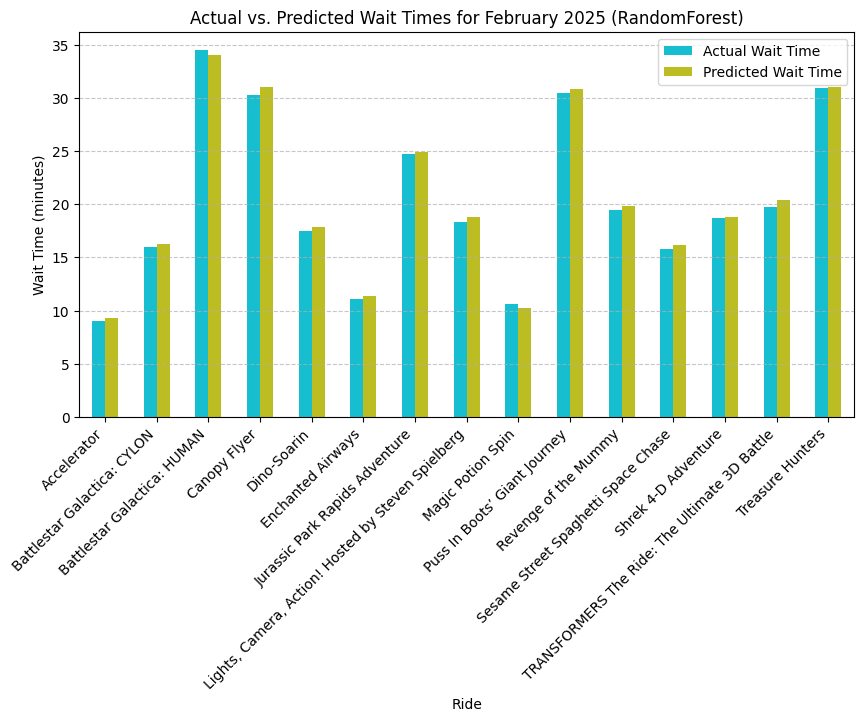

In [132]:
# Identify categorical columns for linear regression
categorical_columns = ["Ride", "Time", "Zone","day_of_week", "is_holiday", "is_seasonal_event"]
waittime_df_february = waittime_df.copy() 

# Prepare OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(waittime_df_february[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([waittime_df_february, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_columns, axis=1)
# print(f"Encoded Waititme data : \n{df_encoded}")

# Identify independent and dependent variables
X = df_encoded.drop(columns=['Wait Time'])
y = df_encoded['Wait Time']

# Split data into training (before Feb 2025) and future prediction (Feb 2025)
train_mask = X['Date'] < datetime(2025, 2, 1) 
test_mask = X['Date'] >= datetime(2025, 2, 1) 

X_train, y_train = X[train_mask].drop(columns=['Date', 'Timestamp']), y[train_mask] 
X_test = X[test_mask].drop(columns=['Date', 'Timestamp'])
y_test = y[test_mask]

# Train RandomForest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict wait times for Feb 28, 2025
y_pred = rf_model.predict(X_test)

# Output results
print(f"Predicted wait times for Feb 2025: \n{y_pred}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Model performance evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Extract actual wait times for February 2025 from df
df_feb_2025 = waittime_df[waittime_df['Date'].dt.strftime('%Y-%m') == '2025-02']

# Create a DataFrame for predictions with corresponding rides
df_predictions = X_test.copy()
df_predictions['Predicted Wait Time'] = y_pred
df_predictions['Date'] = "2025-02"  
df_predictions['Ride'] = waittime_df_february.loc[X_test.index, 'Ride'].values

# Group actual and predicted data by Ride
actual_wait_times = df_feb_2025.groupby('Ride')['Wait Time'].mean()
predicted_wait_times = df_predictions.groupby('Ride')['Predicted Wait Time'].mean()

# Merge actual and predicted values for comparison
wait_time_comparison = pd.DataFrame({
    'Actual Wait Time': actual_wait_times,
    'Predicted Wait Time': predicted_wait_times
}).dropna()  

# Plot comparison of actual vs predicted wait times
plt.figure(figsize=(10, 5))
wait_time_comparison.plot(kind='bar', figsize=(10, 5), color=['tab:cyan', 'tab:olive'])

plt.title("Actual vs. Predicted Wait Times for February 2025 (RandomForest)")
plt.xlabel("Ride")
plt.ylabel("Wait Time (minutes)")
plt.xticks(rotation=45, ha="right")
plt.legend(["Actual Wait Time", "Predicted Wait Time"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 5.3 Conclusion from Machine Learning Models 
- XGBoost is better at predicting hourly average wait times for a ride
- RandomForest is better at predicting average wait times per ride 

## 6. Demand Prediction using Time Series Analysis

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 6.1 Check for Stationarity
#### Step 1: Plot out average wait times and Statistically Test for Stationarity (ADF Test)
- Plot average wait time for all USS rides between 1 January 2024 to 28 February 2025
- Plot hourly wait times for Ride, "Accelerator" between 1 January 2024 to 28 February 2025
- Aim: Plot time series data to examine characteristics of wait times


ADF Test Statistic: -3.351268830704517
P-value: 0.012736622468136167


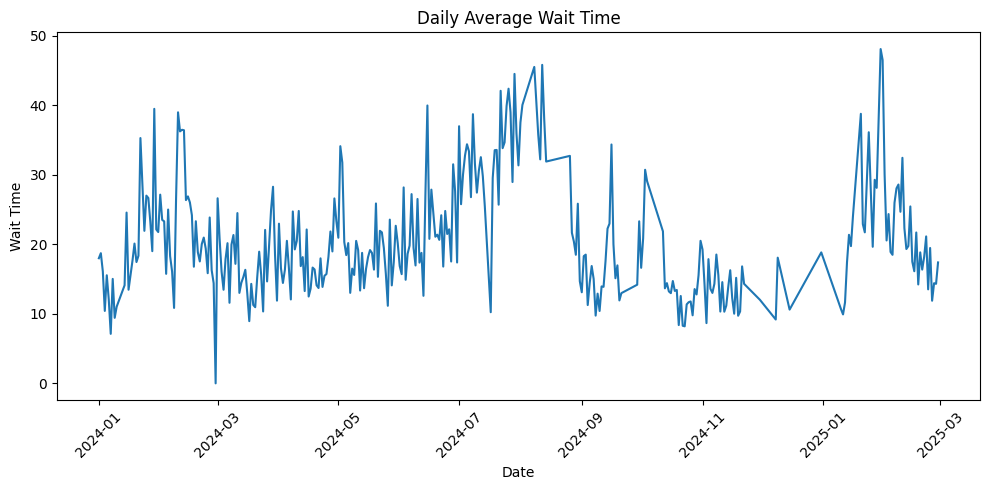

In [113]:
waittime_df = pd.read_csv('../data/waittime_cleandata.csv')
daily_waittime_df = waittime_df.groupby(['Date'])['Wait Time'].mean().reset_index()
daily_waittime_df.columns = ['Date', 'Average Wait Time']
daily_waittime_df['Date'] = pd.to_datetime(daily_waittime_df['Date'])

# Run ADF test on original data
adf_test = adfuller(daily_waittime_df['Average Wait Time'])
print(f"ADF Test Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")

# Time Series plot
plt.figure(figsize=(10, 5))
plt.plot(daily_waittime_df['Date'], daily_waittime_df['Average Wait Time'])
plt.title('Daily Average Wait Time')
plt.xlabel('Date')
plt.ylabel('Wait Time')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

- Even though the p value is <0.05, there are recurring peaks and dips, suggesting seasonal patterns
- The spread of values change overttime, implying that variance is not constant
- Therefore, the plot for average daily wait times of rides in USS Singapore is not stationary

#### Step 2: Apply Differencing to make Time Series stationary

ADF Test (Diff): 5.645266611617065e-14


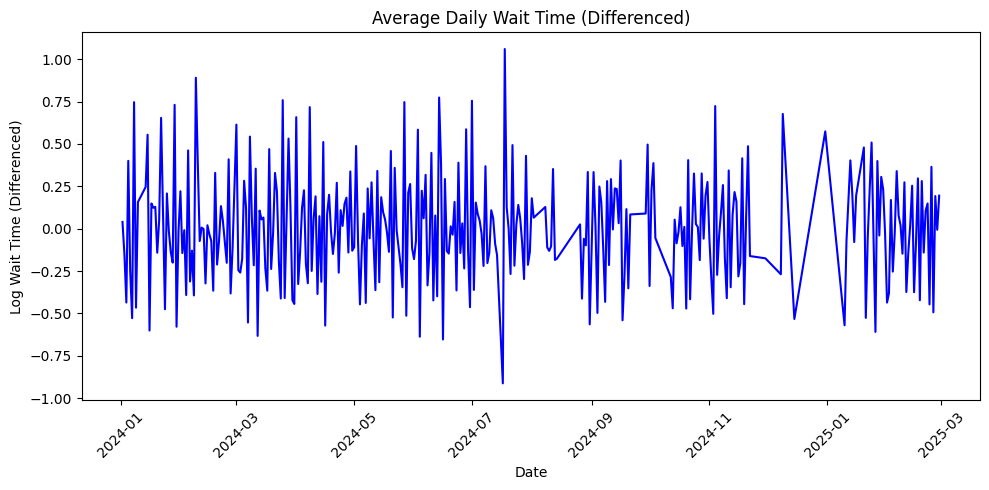

In [114]:
# Ensure 'Average Wait Time' has no zero values 
daily_waittime_df['Average Wait Time'].replace(0, np.nan, inplace=True)
daily_waittime_df.dropna(subset=['Average Wait Time'], inplace=True)

# Apply Log Transformation and First Difference
daily_waittime_df['Log Wait Time'] = np.log(daily_waittime_df['Average Wait Time']) # To stabilize variance
daily_waittime_df['Diff Wait Time'] = daily_waittime_df['Log Wait Time'].diff(periods=1) # d = 1

# Drop NaNs from Differencing
daily_waittime_df.dropna(subset=['Diff Wait Time'], inplace=True)

# Run ADF Test
if daily_waittime_df['Diff Wait Time'].isna().sum() == 0:
    adf_test_diff = adfuller(daily_waittime_df['Diff Wait Time'])
    print(f"ADF Test (Diff): {adf_test_diff[1]}")

# Plot Differenced Series
plt.figure(figsize=(10, 5))
plt.plot(daily_waittime_df['Date'], daily_waittime_df['Diff Wait Time'], color='blue')
plt.title('Average Daily Wait Time (Differenced)')
plt.xlabel('Date')
plt.ylabel('Log Wait Time (Differenced)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- After taking the first difference in wait time, the time series is now stationary and ready for modelling

### 6.2 Identify Model Parameters
- Identify the SARIMA model parameters ($p, d, q, P, D, Q, m$) using ACF and PACF plots
#### Step 1: Identify $p,d,q$ using normal differencing

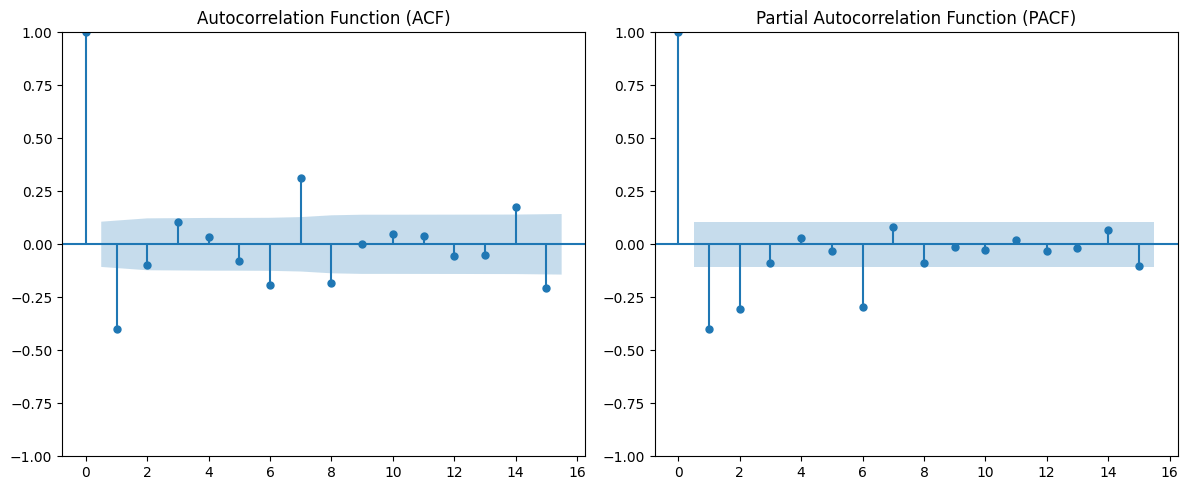

In [115]:
# Plot ACF and PACF plot of normally differenced series 
wait_time_series = daily_waittime_df["Average Wait Time"].diff().dropna()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (Moving Average Order q)
sm.graphics.tsa.plot_acf(wait_time_series, lags=15, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot (Autoregressive Order p)
sm.graphics.tsa.plot_pacf(wait_time_series, lags=15, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

- $p$ (AR term): Determined by the PACF plot. The PACF drops off significantly at lag 1. Hence $p = 1$
- $q$ (MA term): Determined by the ACF plot. The ACF drops off significantly at lag 1. Hence $q = 1$
- $d$ : Determined by number of differences taken. Since the plot is stationary after the first difference, $d = 1$

#### Step 2: Identify $P, D, Q, m$ using seasonal differencing

ADF Statistic: -4.488033549919723
p-value: 0.00020666531092963973


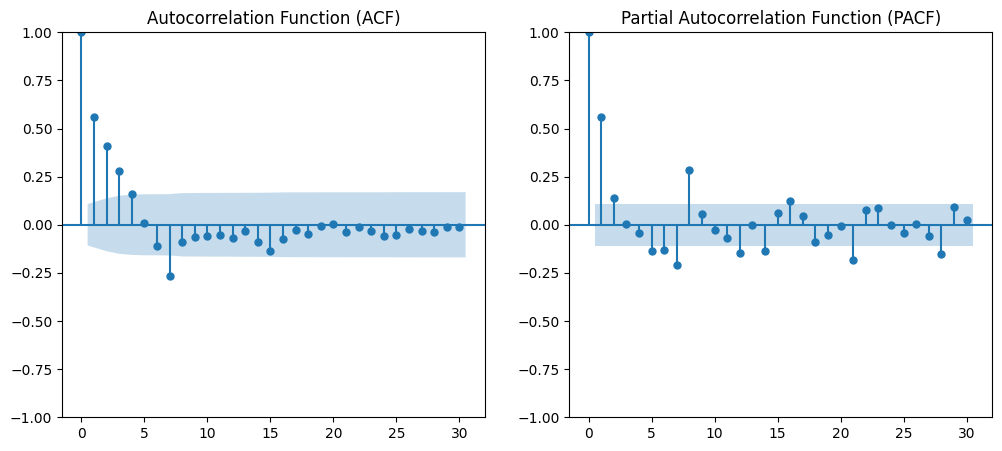

In [116]:
# Prepare Seasonal Difference
daily_waittime_df['Seasonal Diff'] = daily_waittime_df['Log Wait Time'].diff(7)
adf_test_seasonal_diff = adfuller(daily_waittime_df['Seasonal Diff'].dropna())
print("ADF Statistic:", adf_test_seasonal_diff[0])
print("p-value:", adf_test_seasonal_diff[1])

# Plot ACF and PACF plot of seasonally differenced series 
seasonal_wait_time_series = daily_waittime_df["Seasonal Diff"].dropna()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (Moving Average Order q)
sm.graphics.tsa.plot_acf(seasonal_wait_time_series, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

sm.graphics.tsa.plot_pacf(seasonal_wait_time_series, lags=30, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

- $P$ (Seasonal AR term): Determined by the PACF plot. The PACF drops off significantly at lag 1. Hence $P = 1$
- $Q$ (Seasonal MA term): Determined by the ACF plot. The ACF has a noticeable spike at lag 1. Hence, $Q = 1$
- $D$ : Determined by number of seasonal differences taken. Since the plot is stationary after the first difference, $D = 1$
- $m$ (Length of repeating cycles): Assuming weakly seasonality, $m = 7$ is set  

### 6.3 Apply SARIMA Model
- Use a training window of 90 days to predict daily average wait time
- Parameters
    - window_size: size of sliding window
    - n: number of days to predict

          Date  Average Wait Time  Log Wait Time  Diff Wait Time  \
0   2024-04-06          16.658983       2.812950       -0.207921   
1   2024-04-07          12.074585       2.491103       -0.321847   
2   2024-04-08          24.735620       3.208244        0.717141   
3   2024-04-09          19.276245       2.958873       -0.249371   
4   2024-04-10          20.498058       3.020330        0.061457   
..         ...                ...            ...             ...   
218 2025-02-24          19.480483       2.969413        0.364699   
219 2025-02-25          11.890833       2.475768       -0.493645   
220 2025-02-26          14.414989       2.668269        0.192501   
221 2025-02-27          14.319796       2.661643       -0.006626   
222 2025-02-28          17.400974       2.856526        0.194883   

     Seasonal Diff  log_wait_time   Forecast  
0        -0.108068       2.812950  14.850132  
1         0.014321       2.491103  14.655146  
2         0.073674       3.208244  17.9684

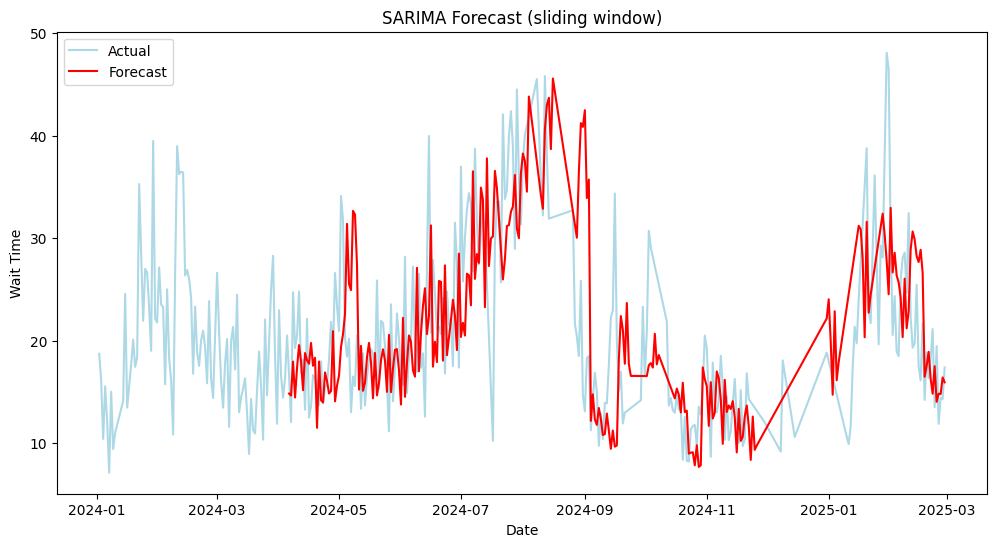

In [117]:
def predict_n_days(window_size, df, n):
    first_date = df['Date'].min()
    last_date = df['Date'].max()
    total_days = (last_date - first_date).days

    # Take log of Wait Time
    df['log_wait_time'] = np.log(df['Average Wait Time']) # Removes variance in wait times

    forecast_results = []
    forecast_dates = []
    
    for i in range(0, total_days - window_size, n):
        if i + window_size <= len(df): 
            train_window = df['log_wait_time'].iloc[i:i + window_size]
        else:
            break
        
        # Fit SARIMA model
        model = SARIMAX(train_window, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), 
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=500)

        # Forecast for next n days
        forecast = results.get_forecast(steps=n)
        forecast_vals = np.exp(forecast.predicted_mean)

        last_window_date = df['Date'].iloc[i + window_size - 1] 
        
        # Store each of n forecasted days
        for j in range(n):
            forecast_date = last_window_date + pd.Timedelta(days=j)
            if forecast_date <= df['Date'].max():
                forecast_results.append(forecast_vals.iloc[j])
                forecast_dates.append(forecast_date)
            else:
                break

    # Create dataframe for Forecast results
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_results})
    forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

    return forecast_df

def plot_predictions(actual_df, forecast_df):
    plt.figure(figsize=(12, 6))
    plt.plot(actual_df['Date'], actual_df['Average Wait Time'], label='Actual', color='lightblue')
    plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
    plt.title("SARIMA Forecast (sliding window)")
    plt.xlabel('Date')
    plt.ylabel('Wait Time')
    plt.legend()
    plt.show()

def compute_metrics(actual_df, forecast_df):
    merged = actual_df.merge(forecast_df, on='Date', how='inner')
    merged = merged.dropna(subset=['Forecast'])
    print(merged)
    merged.to_csv('test.csv')
    mae = mean_absolute_error(merged['Average Wait Time'], merged['Forecast'])
    rmse = np.sqrt(mean_squared_error(merged['Average Wait Time'], merged['Forecast']))
    return {'MAE': mae, 'RMSE': rmse}

forecast_df = predict_n_days(90, daily_waittime_df, 7)
full_metrics = compute_metrics(daily_waittime_df, forecast_df)
print(full_metrics)
plot_predictions(daily_waittime_df, forecast_df)


- A forecast period of 7 days ($n = 7$) is chosen. This means predicting the average wait time for the next week.
- This forecast period is selected based on the assumption that the data exhibits weekly seasonality, meaning patterns repeat approximately every seven days

### 6.4 Add Exogenous Variables to SARIMA Model
#### Step 1: Define SARIMA Model (with exogenous variable)

In [118]:
def predict_n_days_with_exog(window_size, df, n, exog_columns):
    first_date = df['Date'].min()
    last_date = df['Date'].max()
    total_days = (last_date - first_date).days

    # Define exogenous variables
    exog_columns = ["Temperature (°C)", "Rainfall (mm)", "day_of_week", "is_holiday", "is_seasonal_event"]

    # Take log of Wait Time
    df['log_wait_time'] = np.log(df['Average Wait Time'])  # Reduce variance

    forecast_results = []
    forecast_dates = []

    for i in range(0, total_days - window_size, n):
        if i + window_size <= len(df): 
            # Create the exogenous DataFrame and reset the index
            train_window = df['log_wait_time'].iloc[i:i + window_size].reset_index(drop=True)
            train_exog = df[exog_columns].iloc[i:i + window_size].reset_index(drop=True)

            # Ensure indices match
            train_window.index = range(len(train_window))
            train_exog.index = range(len(train_exog))   
        else:
            break

        # Fit SARIMA model with Exogenous Variables
        model = SARIMAX(train_window, 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 7),
                        exog=train_exog,  
                        enforce_stationarity=False, 
                        enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=500)

        # Forecast for next n days
        if i + window_size + n <= len(df):
            forecast_exog =  df[exog_columns].iloc[i + window_size:i + window_size + n].reset_index(drop=True)

            forecast = results.get_forecast(steps=n, exog=forecast_exog)  
            forecast_vals = np.exp(forecast.predicted_mean) 
        else:
            break

        last_window_date = df['Date'].iloc[i + window_size - 1] 
        
        # Store each of n forecasted days
        for j in range(n):
            forecast_date = last_window_date + pd.Timedelta(days=j)
            if forecast_date <= df['Date'].max():
                forecast_results.append(forecast_vals.iloc[j])
                forecast_dates.append(forecast_date)
            else:
                break

    # Create dataframe for Forecast results
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast_results})
    forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])

    return forecast_df


#### Step 2: Apply SARIMA model on Accelerator Ride

            Ride       Date  Average Wait Time  Temperature (°C)  is_holiday  \
56   Accelerator 2024-05-30           5.253788              29.5           1   
57   Accelerator 2024-05-31           9.837121              29.6           1   
58   Accelerator 2024-06-01           8.138636              27.2           1   
59   Accelerator 2024-06-02           9.958333              27.6           1   
60   Accelerator 2024-06-03          18.108333              28.5           1   
..           ...        ...                ...               ...         ...   
134  Accelerator 2024-10-25           4.347222              29.3           0   
135  Accelerator 2024-10-26           6.674242              30.0           0   
136  Accelerator 2024-10-27           5.666667              30.6           0   
137  Accelerator 2024-10-28           4.193182              30.1           0   
138  Accelerator 2024-10-29           4.113636              30.2           0   

     is_seasonal_event  Rainfall (mm)  

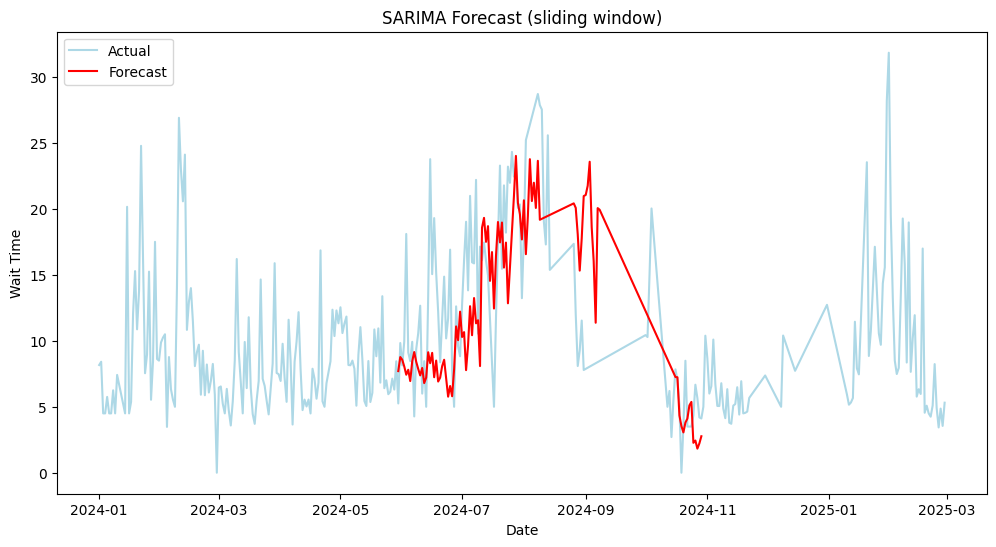

In [119]:
waittime_df = pd.read_csv('../model/waittime_df.csv')
attraction_daily_stats_df = waittime_df.groupby(['Ride', 'Date']).agg(
    {
        'Wait Time': 'mean',  # Calculate average wait time
        'Temperature (°C)': 'mean',  # Calculate average temperature
        'is_holiday': 'first',  # You can use 'first' or 'mode' depending on your data
        'is_seasonal_event': 'first',  # Same for other columns
        'Rainfall (mm)': 'mean',  # If you want average rainfall
        'day_of_week': 'first',  # Assuming this is consistent per date
        # Add any other columns you want to include
    }).reset_index()
attraction_daily_stats_df.rename(columns={'Wait Time': 'Average Wait Time'}, inplace=True)

# Filter for Accelerator Ride
attraction_daily_stats_df = attraction_daily_stats_df[attraction_daily_stats_df['Ride'] == "Accelerator"].copy()
attraction_daily_stats_df['Date'] = pd.to_datetime(attraction_daily_stats_df['Date'])

def plot_predictions(actual_df, forecast_df):
    plt.figure(figsize=(12, 6))
    plt.plot(actual_df['Date'], actual_df['Average Wait Time'], label='Actual', color='lightblue')
    plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
    plt.title("SARIMA Forecast (sliding window)")
    plt.xlabel('Date')
    plt.ylabel('Wait Time')
    plt.legend()
    plt.show()

def compute_metrics(actual_df, forecast_df):
    merged = actual_df.merge(forecast_df, on='Date', how='inner')
    merged = merged.dropna(subset=['Forecast'])
    print(merged)
    merged.to_csv('test.csv')
    mae = mean_absolute_error(merged['Average Wait Time'], merged['Forecast'])
    rmse = np.sqrt(mean_squared_error(merged['Average Wait Time'], merged['Forecast']))
    return {'MAE': mae, 'RMSE': rmse}

exog_columns =["Temperature (°C)","Rainfall (mm)", "day_of_week", "is_holiday", "is_seasonal_event"] # Similar to categorical columns for machine learning models
forecast_df = predict_n_days_with_exog(90, attraction_daily_stats_df, 14, exog_columns)

full_metrics = compute_metrics(attraction_daily_stats_df, forecast_df)
print(full_metrics)
plot_predictions(attraction_daily_stats_df, forecast_df)

> will be adding a section here that applies the models on eateries

> will be adding a section here that summarizes all the models